#Import Library and Dataset

In [ ]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns

*   Numpy untuk memanipulasi array
*   Pandas untuk mengimport dan memanipulasi dataset
*   matplotlib.pyplot untuk pembuatan grafik
*   sklearn.StandardScaler untuk normalisasi data
*   sklearn.metrics untuk mendapatkan nilai evaluasi model (MSE, R2 score, confusion matrix, dan nilai akurasi)
*   train_test_split untuk memisahkan atau membagi data untuk training dan testing
*   pandas.plotting untuk visualisasi data
*   seaborn untuk visualisasi data

In [ ]:
# import dataset
df = pd.read_csv('insurance-cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.a) Setelah menginput dataset pada dataframe, maka kita dapat melihat variabel apa saja yang ada dan karena persyaratan yang ada memerlukan semua variabel yang ada maka tidak ada variabel yang dihilangan






#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1336 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1336 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dari tipe data yang ada, maka dapat diambil informasi bahwa data yang bersifat categorical adalah sex (object), smoker (object), dan region (object). Sementara data lain merupakan data continuous

In [ ]:
# check for missing values
df.isnull().sum()

age         0
sex         0
bmi         2
children    0
smoker      2
region      0
charges     0
dtype: int64

Menurut ketentuan soal 1.b maka missing values akan diganti, oleh karena itu, saya akan mengecek dan memisahkan data tersebut ke dalam dataframe baru bernama missing_data

In [ ]:
missing_data = df[df.isnull().any(1)]
missing_data = missing_data.fillna(0)
missing_data

,age,sex,bmi,children,smoker,region,charges
30,22,male,0.00,0,yes,southwest,35585.5760
32,19,female,28.60,5,0,southwest,4687.7970
51,21,female,0.00,2,no,northwest,3579.8287
53,36,male,34.43,0,0,southeast,37742.5757


Kemudian data yang missing ini akan diubah sesuai dengan ketentuan pada soal 1.b

*   Variabel yang bersifat continuous, pada kasus ini **bmi**, diisi dengan nilai rata-rata dari variabel. 
*   Variabel yang bersifat categorical, pada kasus ini **smoker**, diisi dengan nilai modus dari variabel. 
*   Pengisian missing values juga mempertimbangkan jenis kelamin. Artinya, jika nilai variabel yang kosong adalah milik pemegang asuransi berjenis kelamin pria, maka nilai modus atau mean hanya dihitung terhadap samples berjenis kelamin pria. 



In [ ]:
# pemisahan dataframe untuk data baru berdasarkan gender
male_data = df[df['sex'] == 'male']
female_data = df[df['sex'] == 'female']

# pengubahan data sesuai dengan ketentuan nomor 1.b
for x in missing_data.index:
    if missing_data.at[x,'sex']=='male':
        if missing_data.at[x,'bmi'] == 0:
            missing_data.at[x,'bmi'] = male_data['bmi'].mean()
            print("update male bmi success")
        else:
             missing_data.at[x,'smoker'] = male_data['smoker'].mode()[0]
             print("update male smoker success")
    else:
        if missing_data.at[x,'bmi'] == 0:
            missing_data.at[x,'bmi'] = female_data['bmi'].mean()
            print("update female bmi success")
        else:
             missing_data.at[x,'smoker'] = female_data['smoker'].mode()[0]
             print("update female smoker success")

missing_data

update male bmi success
update female smoker success
update female bmi success
update male smoker success


,age,sex,bmi,children,smoker,region,charges
30,22,male,30.936230,0,yes,southwest,35585.5760
32,19,female,28.600000,5,no,southwest,4687.7970
51,21,female,30.372829,2,no,northwest,3579.8287
53,36,male,34.430000,0,no,southeast,37742.5757


In [ ]:
# gabungkan missing data yang sudah diupdate nilainya dan 
# hilangkan missing data yang belum diupdate
df = df.dropna()
df = pd.concat([df, missing_data])
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900000,0,yes,southwest,16884.92400
1,18,male,33.770000,1,no,southeast,1725.55230
2,28,male,33.000000,3,no,southeast,4449.46200
3,33,male,22.705000,0,no,northwest,21984.47061
4,32,male,28.880000,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1337,61,female,29.070000,0,yes,northwest,29141.36030
30,22,male,30.936230,0,yes,southwest,35585.57600
32,19,female,28.600000,5,no,southwest,4687.79700
51,21,female,30.372829,2,no,northwest,3579.82870


#Data Visualization

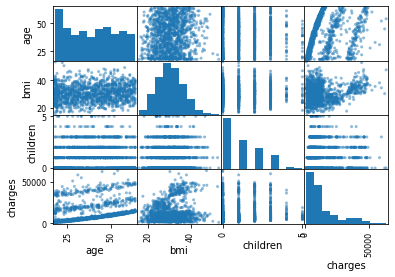

In [ ]:
# Multivariate plots: scatter plot matrix
scatter_matrix(df)
pyplot.show()

Menunjukkan hubungan antara dua variabel

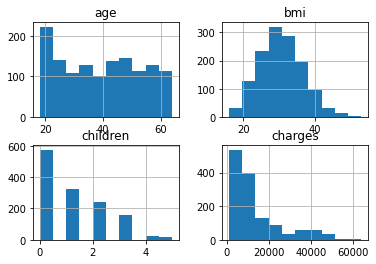

In [ ]:
# Histograms
df.hist()
pyplot.show()

Menunjukkan range data dari setiap variabel

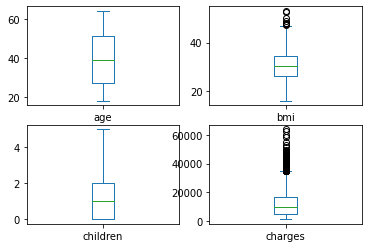

In [ ]:
# Univariate plots: box and whisker plots
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

Menunjukkan ada tidaknya outlier dari setiap variable, terutama variabel independent

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


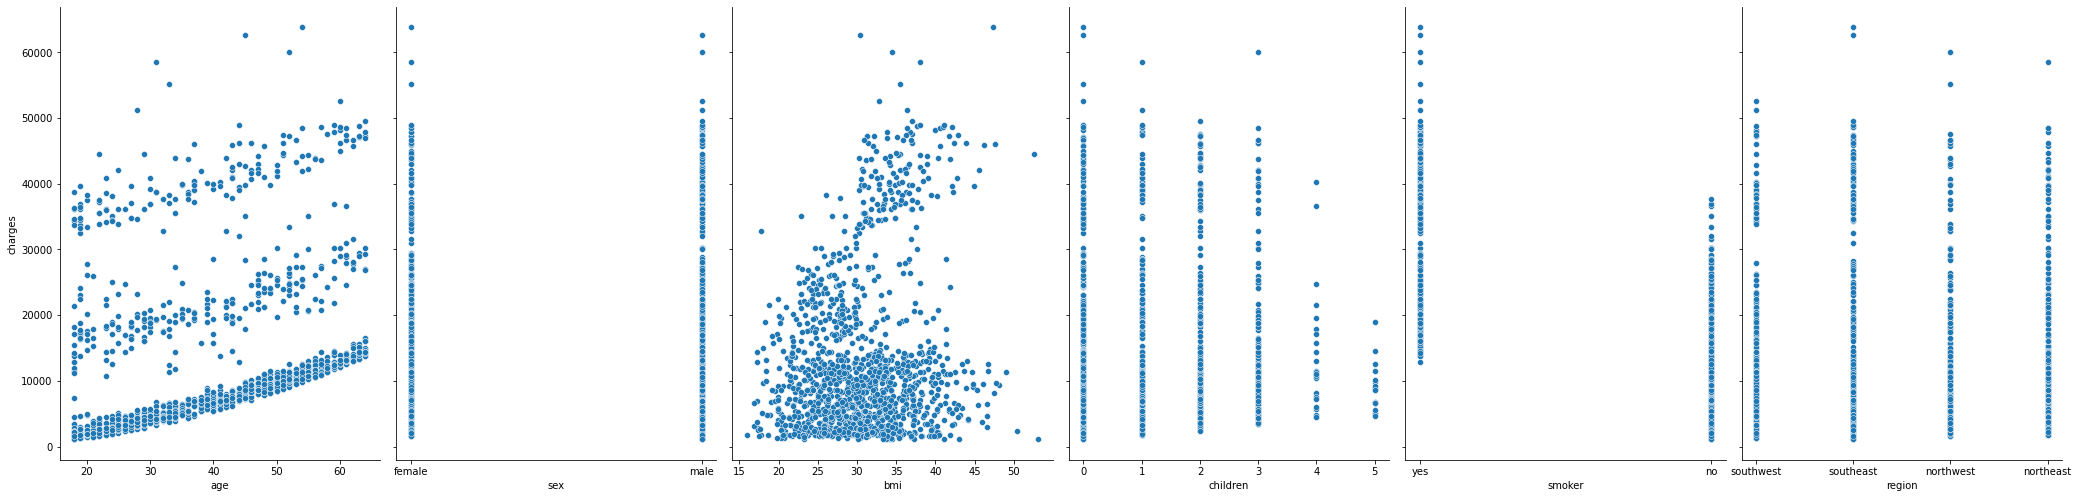

In [ ]:
# Visualize the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['age','sex','bmi','children','smoker','region'], y_vars='charges', size=7, aspect=0.7)

Menunjukkan hubungan antara semua variabel independent dengan variabel dependent.

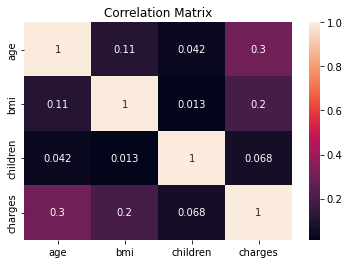

In [ ]:
sns.heatmap(data=df.corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()

Corelation matrix ini menunjukkan seberapa berpengaruh variabel independent tersebut kepada hasil variabel independent. Dari correlation matrix ini dapat dikatakan bahwa hubungan yang ada cukup rendah karena tidak ada yang lebih besar dari 0.5 nilainya

#Splitting Dataset

In [ ]:
# Deklarasi independent dan dependent variable
X = df.iloc[:, :-1]    # independent varible
y = df.iloc[:, -1]     # dependent variable

In [ ]:
# ubah data berbentuk category menjadi numeric
sex = pd.get_dummies(X['sex'], drop_first=True)
sex.head()

,male
0,0
1,1
2,1
3,1
4,1


In [ ]:
# ubah data berbentuk category menjadi numeric
region = pd.get_dummies(X['region'], drop_first=True)
region.head()

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
# ubah data berbentuk category menjadi numeric
smoker = pd.get_dummies(X['smoker'], drop_first=True)
smoker.head()

,yes
0,1
1,0
2,0
3,0
4,0


Pada tahap ini, bukan hanya nilai (misal yes dan no menjadi 0 dan 1) tetapi juga ada categori yang dihilangkan karena bersifat multicollinear (misal ada northwest, southwest, northeast, dan southeast dibuat menjadi northwest, southwest, dan southeast karena northeast dapat diwakilkan melalui nilai ketiga kategori lainnya)

In [ ]:
# hilangkan data yang lama
X = X.drop('sex', axis=1)
X = X.drop('region', axis=1)
X = X.drop('smoker', axis=1)

# gabungkan data yang sudah diupdate ke dalam dataframe awal
X = pd.concat([X, sex], axis=1)
X = pd.concat([X, region], axis=1)
X = pd.concat([X, smoker], axis=1)

X.head()

,age,bmi,children,male,northwest,southeast,southwest,yes
0,19,27.900,0,0,0,0,1,1
1,18,33.770,1,1,0,1,0,0
2,28,33.000,3,1,0,1,0,0
3,33,22.705,0,1,1,0,0,0
4,32,28.880,0,1,1,0,0,0


In [ ]:
# standarization
sc = StandardScaler()
X = sc.fit_transform(X)
print (X[:10])

[[-1.43876426 -0.45249932 -0.90861367 -1.0105187  -0.56641788 -0.61132367
   1.76548098  1.97511997]
 [-1.50996545  0.51076207 -0.07876719  0.98959079 -0.56641788  1.63579466
  -0.56641788 -0.50629836]
 [-0.79795355  0.3844058   1.58092576  0.98959079 -0.56641788  1.63579466
  -0.56641788 -0.50629836]
 [-0.4419476  -1.30499385 -0.90861367  0.98959079  1.76548098 -0.61132367
  -0.56641788 -0.50629836]
 [-0.51314879 -0.29168226 -0.90861367  0.98959079  1.76548098 -0.61132367
  -0.56641788 -0.50629836]
 [-0.58434998 -0.80695325 -0.90861367 -1.0105187  -0.56641788  1.63579466
  -0.56641788 -0.50629836]
 [ 0.48366788  0.45660938 -0.07876719 -1.0105187  -0.56641788  1.63579466
  -0.56641788 -0.50629836]
 [-0.15714284 -0.47875517  1.58092576 -1.0105187   1.76548098 -0.61132367
  -0.56641788 -0.50629836]
 [-0.15714284 -0.13578816  0.75107928  0.98959079 -0.56641788 -0.61132367
  -0.56641788 -0.50629836]
 [ 1.48048454 -0.79054335 -0.90861367 -1.0105187   1.76548098 -0.61132367
  -0.56641788 -0.

Standarisasi data dilakukan agar data lebih mudah diolah (menghindari overfitting dan ketidaktepatan dalam perhitungan lainnya)

In [ ]:
# membagi training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Sesuai dengan ketentuan nomor 2, maka saya membagi data untuk training dan testing dengan rasio 4:1 atau bisa disebut juga **80% training** dan **20% testing**.

In [ ]:
# melihat training set
X_train

array([[-0.72675236, -0.75936453, -0.90861367, ..., -0.61132367,
        -0.56641788, -0.50629836],
       [ 0.83967383, -2.0688749 , -0.90861367, ..., -0.61132367,
        -0.56641788, -0.50629836],
       [ 1.69408811, -0.47875517, -0.90861367, ..., -0.61132367,
        -0.56641788,  1.97511997],
       ...,
       [-0.65555117, -1.42970912, -0.07876719, ..., -0.61132367,
        -0.56641788, -0.50629836],
       [ 0.76847264,  2.31585155, -0.07876719, ...,  1.63579466,
        -0.56641788, -0.50629836],
       [ 0.55486907, -1.07607568, -0.07876719, ..., -0.61132367,
         1.76548098, -0.50629836]])

In [ ]:
# ubah menjadi array 2D
X_train = np.c_[np.ones(len(X_train),dtype='int64'),X_train]                        
X_test = np.c_[np.ones(len(X_test),dtype='int64'),X_test]

#Linear Regression

In [ ]:
# pembuatan model
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y)**2)/(2 * m)
    return J

def batch_gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)
    for iteration in range(iterations):
     # Hypothesis Values
         h = X.dot(B)
     # Difference between Hypothesis and Actual Y
         loss = h - Y
     # Gradient Calculation
         gradient = X.T.dot(loss) / m
     # Changing Values of B using Gradient
         B = B - alpha * gradient
     # New Cost Value
         cost = cost_function(X, Y, B)
         cost_history[iteration] = cost
    return B, cost_history

In [ ]:
# training dengan epoch = 300 dan learning rate = 0.05
b = np.zeros(X_train.shape[1])
alpha = 0.05
iter_ = 300
newb, cost_history = batch_gradient_descent(X_train, y_train, b, alpha, iter_)

Text(0.5, 1.0, 'Error vs. Training Epoch')

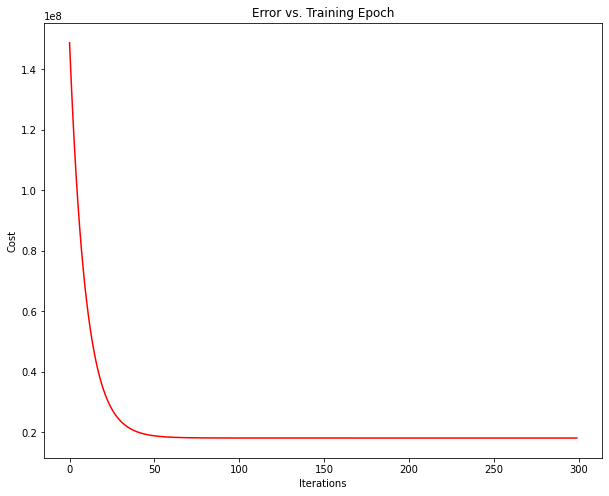

In [ ]:
# melihat penurunan nilai error saat training
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(iter_), cost_history, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [ ]:
# prediksi nilai y dari test set
y_pred = X_test.dot(newb)

# perbandingan nilai y_pred
compare = pd.DataFrame({
    'prediction': y_pred,
    'ground truth': y_test
})

compare.head()

,prediction,ground truth
582,13670.396699,6356.27070
614,3365.634155,1880.07000
573,17126.450555,31620.00106
1038,3833.317511,2250.83520
202,10871.352086,13012.20865


#Evaluation

In [ ]:
# evaluasi dari hasil prediksi
total_data = len(df)

MSE = mean_squared_error(y_test, y_pred)
print ("MSE :", MSE)

RMSE = mean_squared_error(y_test, y_pred, squared = False)
print ("RMSE :", RMSE)

score = r2_score(y_test, y_pred)
print ("R2 :", score)

r2adj = 1 - (1 - score) * ((total_data - 1) / (total_data - 4 - 1))
print ("Adjusted R-Squared :", r2adj)

MAE = mean_absolute_error(y_test, y_pred)
print ("MAE:", MAE)

MSE : 40957614.03024897
RMSE : 6399.813593398559
R2 : 0.7021442532305926
Adjusted R-Squared : 0.7012504625426124
MAE: 4306.817646753142


Untuk evaluationnya sendiri, saya menggunakan MSE, R2 dan MAE. Ketiga tersebut merupakan evaluation methods untuk problem regression. Berikut merupakan penjelasannya.


*   MSE atau mean square error merupakan Mean atau Average dari kuadrat perbedaan antara nilai aktual dan perkiraan. Akan tetapi MSE sangat sensitif dengan adanya outlier.
*   R2 juga dikenal sebagai koefisien penentuan, adalah ukuran seberapa dekat nilai yang diamati dengan garis regresi yang dipasang. nilai R2  berkisar dari 0 hingga 1, dimana skor 1 akan menunjukkan model yang dapat menjelaskan semua varians dalam variabel dependen. Nilai R2 ini sendiri tidak terpengaruh oleh outlier, maka menunjukan representasi yang lebih baik
* MAE atau mean absolue errormengukur perbedaan rata-rata antara nilai prediksi dan nilai aktual. Berbeda dengan mean squared error (MSE), MAE menghitung kesalahan pada skala yang sama dengan data. Ini berarti lebih mudah untuk menafsirkan dan kurang rentan terhadap outlier




Berdasarkan model di atas, hasil MSE yang didapatkan adalah 40957614.03024897 dan RMSE 6399.813593398559. Hasil ini dikarenakan oleh MSE sangat dipengaruhi oleh outlier. sesuai dengan data visualisation diatas, terdapat beberapa outlier pada dataset tersebu. oleh karena itu , nilai MSE ini cukup tinggi. Untuk MAEnya sendiri menghasilkan nilai 4306.817646753142. 

Di lain sisi, pada nilai r2nya mendapatkan nilai 0.7021442532305926 dan Adjusted R-Squared dengan nilai 0.7012504625426124. Hasilnya menunjukan model memiliki hasil yang cukup baik dengan 70%.



In [ ]:
# Persamaan

# Coefficient
print(newb)

[13220.49896152  3507.49015955  2263.05959181   515.68024265
    43.89827211  -242.25760452  -627.66370767  -503.36555601
  9501.85827072]


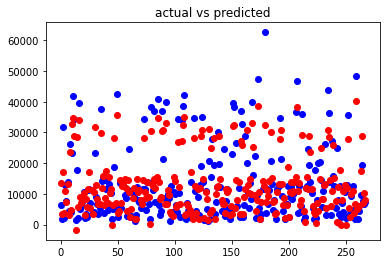

In [ ]:
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return

plotGraph(y_test, y_pred, "actual vs predicted")